In [1]:
setwd("./")
getwd()

library(foreign)
Data <- read.spss("data.sav",to.data.frame=TRUE)


[1] "/home/dev/Documents/ESAN/Multivariado I/Project"

In [2]:
install.packages(c("dplyr", "ggplot2", "factoextrab", "cluster", "tidyverse", "haven", "ggfortify"))

Installing packages into ‘/home/dev/R/library’
(as ‘lib’ is unspecified)



Warning message:
“package ‘factoextrab’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
also installing the dependencies ‘selectr’, ‘rvest’


Warning message in install.packages(c("dplyr", "ggplot2", "factoextrab", "cluster", :
“installation of package ‘rvest’ had non-zero exit status”
Warning message in install.packages(c("dplyr", "ggplot2", "factoextrab", "cluster", :
“installation of package ‘tidyverse’ had non-zero exit status”


In [3]:
library(dplyr)

attach(Data)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
glimpse(Data)

Rows: 4,231
Columns: 20
$ enc   <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 1…
$ p5_1  <dbl> 9, 10, 10, 10, 10, 10, 10, 9, 10, 10, 5, 10, 8, 10, 8, 8, 9, 7, …
$ p5_2  <dbl> 8, 10, 10, 10, 10, 10, 9, 9, 10, 10, 8, 10, 8, 10, 8, 8, 9, 7, 1…
$ p5_3  <dbl> 8, 10, 10, 10, 10, 10, 7, 9, 10, 10, 8, 10, 8, 10, 8, 8, 9, 7, 1…
$ p5_4  <dbl> 9, 10, 10, 10, 10, 10, 8, 9, 10, 9, 9, 10, 8, 10, 8, 8, 9, 7, 9,…
$ p5_5  <dbl> 9, 10, 10, 5, 10, 6, 5, 9, 8, 7, 9, 6, 8, 10, 8, 8, 8, 8, 10, 10…
$ p5_6  <dbl> 9, 10, 10, 10, 9, 10, 6, 10, 9, 10, 9, 9, 8, 9, 8, 8, 9, 8, 10, …
$ p5_7  <dbl> 8, 10, 10, 10, 10, 10, 6, 10, 8, 10, 9, 10, 8, 9, 8, 8, 9, 8, 10…
$ p5_8  <dbl> 7, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 10, 8, 10, 9, 8, 9, 8,…
$ p5_9  <dbl> 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 10, 8, 10, 9, 8, 9, 8,…
$ p5_10 <dbl> 7, 10, 10, 10, 9, 10, 10, 10, 9, 10, 9, 10, 8, 10, 8, 8, 8, 8, 9…
$ p5_11 <dbl> 7, 10, 10, 10, 9, 10, 10, 10, 9, 10, 9, 10, 8, 10, 8, 7, 8, 8, 9…
$ p7_1  <dbl> 10

In [7]:
colnames(Data) <- c(   "Survey", 
    "Store Location", 
    "Counter Efficiency", 
    "Counter Staff Engagement", 
    "Friendliness", 
    "Product & Service Offering", 
    "Product Knowledge", 
    "Information Clarity", 
    "Waiting Time", 
    "Service Time", 
    "Process Simplicity", 
    "Flexibility", 
    "Promotional Activities", 
    "Organization", 
    "Cleanliness", 
    "Staff Appearance", 
    "Facility Infrastructure", 
    "Comfort", 
    "Staff Identification", 
    "Overall Satisfaction")
glimpse(Data)

Rows: 4,231
Columns: 20
$ Survey                       <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13…
$ `Store Location`             <dbl> 9, 10, 10, 10, 10, 10, 10, 9, 10, 10, 5, …
$ `Counter Efficiency`         <dbl> 8, 10, 10, 10, 10, 10, 9, 9, 10, 10, 8, 1…
$ `Counter Staff Engagement`   <dbl> 8, 10, 10, 10, 10, 10, 7, 9, 10, 10, 8, 1…
$ Friendliness                 <dbl> 9, 10, 10, 10, 10, 10, 8, 9, 10, 9, 9, 10…
$ `Product & Service Offering` <dbl> 9, 10, 10, 5, 10, 6, 5, 9, 8, 7, 9, 6, 8,…
$ `Product Knowledge`          <dbl> 9, 10, 10, 10, 9, 10, 6, 10, 9, 10, 9, 9,…
$ `Information Clarity`        <dbl> 8, 10, 10, 10, 10, 10, 6, 10, 8, 10, 9, 1…
$ `Waiting Time`               <dbl> 7, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9,…
$ `Service Time`               <dbl> 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9,…
$ `Process Simplicity`         <dbl> 7, 10, 10, 10, 9, 10, 10, 10, 9, 10, 9, 1…
$ Flexibility                  <dbl> 7, 10, 10, 10, 9, 10, 10, 10, 9, 10, 9, 1…
$ `Promotional A

In [8]:
null_data <- colSums(is.na(Data))  |> as.data.frame()
null_data


,colSums(is.na(Data))
,<dbl>
Survey,0
Store Location,0
Counter Efficiency,0
Counter Staff Engagement,0
Friendliness,0
Product & Service Offering,0
Product Knowledge,0
Information Clarity,0
Waiting Time,0


In [9]:
library(knitr)
kable(summary(Data[, -1]))




|   |Store Location |Counter Efficiency |Counter Staff Engagement | Friendliness  |Product & Service Offering |Product Knowledge |Information Clarity | Waiting Time  | Service Time  |Process Simplicity | Flexibility   |Promotional Activities | Organization  | Cleanliness   |Staff Appearance |Facility Infrastructure |   Comfort     |Staff Identification |Overall Satisfaction |
|:--|:--------------|:------------------|:------------------------|:--------------|:--------------------------|:-----------------|:-------------------|:--------------|:--------------|:------------------|:--------------|:----------------------|:--------------|:--------------|:----------------|:-----------------------|:--------------|:--------------------|:--------------------|
|   |Min.   : 1.000 |Min.   : 1.000     |Min.   : 1.000           |Min.   : 1.000 |Min.   : 1.000             |Min.   : 1.000    |Min.   : 1.000      |Min.   : 1.000 |Min.   : 1.000 |Min.   : 1.000     |Min.   : 1.000 |Min.   : 1.000       

In [10]:
rownames(Data) <- Data[[1]]

Data <- Data[, -1]

head(Data)


,Store Location,Counter Efficiency,Counter Staff Engagement,Friendliness,Product & Service Offering,Product Knowledge,Information Clarity,Waiting Time,Service Time,Process Simplicity,Flexibility,Promotional Activities,Organization,Cleanliness,Staff Appearance,Facility Infrastructure,Comfort,Staff Identification,Overall Satisfaction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9,8,8,9,9,9,8,7,8,7,7,10,10,10,9,10,10,10,8
2,10,10,10,10,10,10,10,10,10,10,10,9,10,10,10,10,10,10,10
3,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
4,10,10,10,10,5,10,10,10,10,10,10,8,10,10,10,10,10,10,10
5,10,10,10,10,10,9,10,10,10,9,9,10,10,10,10,10,10,10,10
6,10,10,10,10,6,10,10,10,10,10,10,10,10,10,10,10,10,10,10


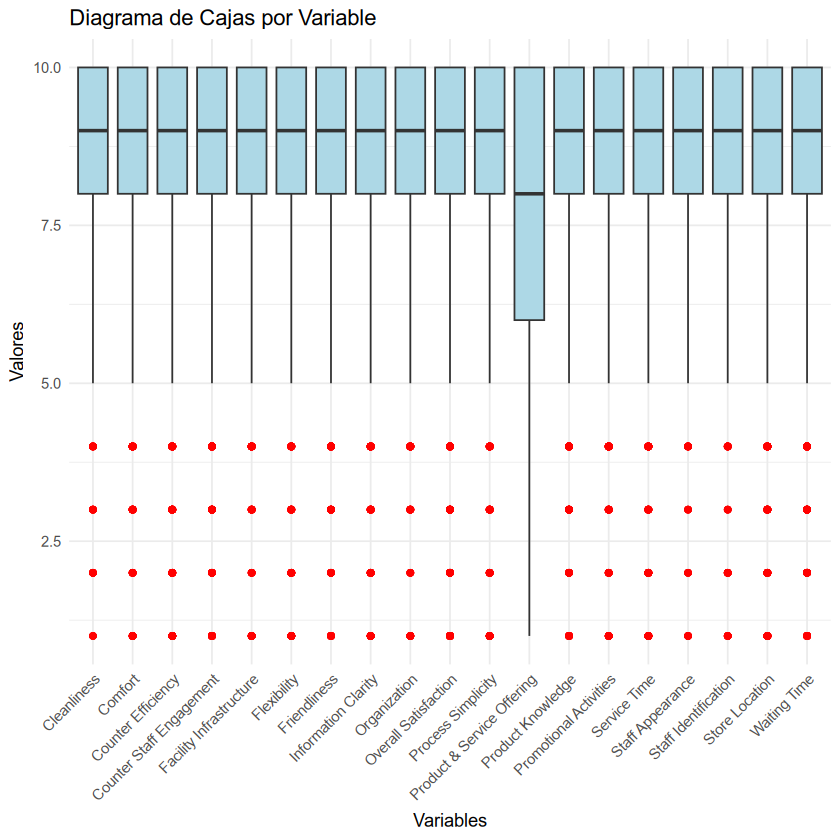

In [ ]:
library(ggplot2)
library(tidyr)

Data_long <- pivot_longer(Data, cols = everything(), names_to = "variable", values_to = "valor")

ggplot(Data_long, aes(x = variable, y = valor)) +
  geom_boxplot(fill = "lightblue", outlier.colour = "red") +
  theme_minimal() +
  labs(title = "Box Plot per Variable", x = "Variables", y = "Values") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



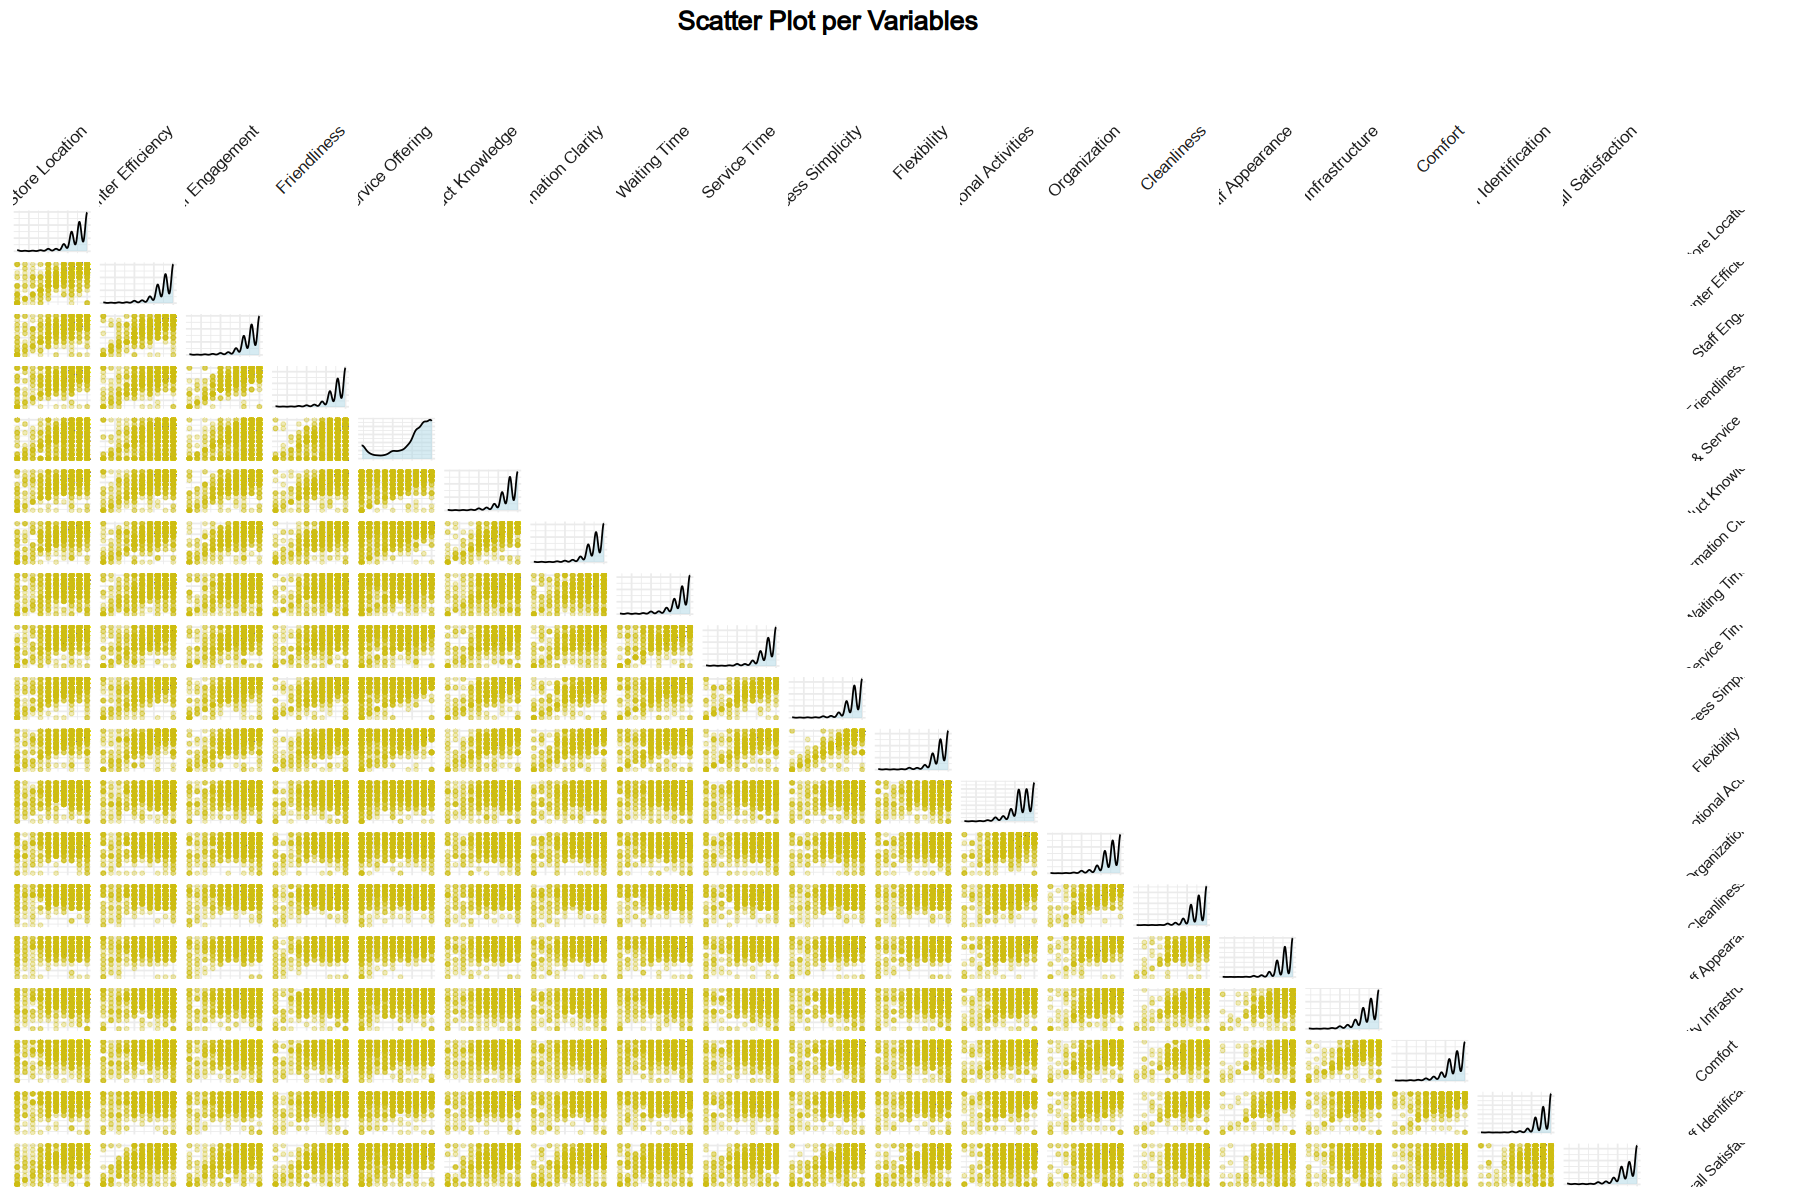

In [12]:
library(GGally)
library(ggplot2)

options(repr.plot.width = 15, repr.plot.height = 10)

ggpairs(Data, 
        title = "Scatter Plot per Variables",
        upper = list(continuous = wrap("blank")),  
        lower = list(continuous = wrap("points", size = 1, alpha = 0.3, color = "#ccbd13")),  
        
        diag = list(continuous = wrap("densityDiag", alpha = 0.5, fill = "lightblue"))) +  
        theme_minimal() +  
         theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),  
              axis.text.x = element_blank(),    
              axis.text.y = element_blank(),
              strip.text.x = element_text(size = 10, angle = 45, hjust = 1), 
              strip.text.y = element_text(angle = 45))


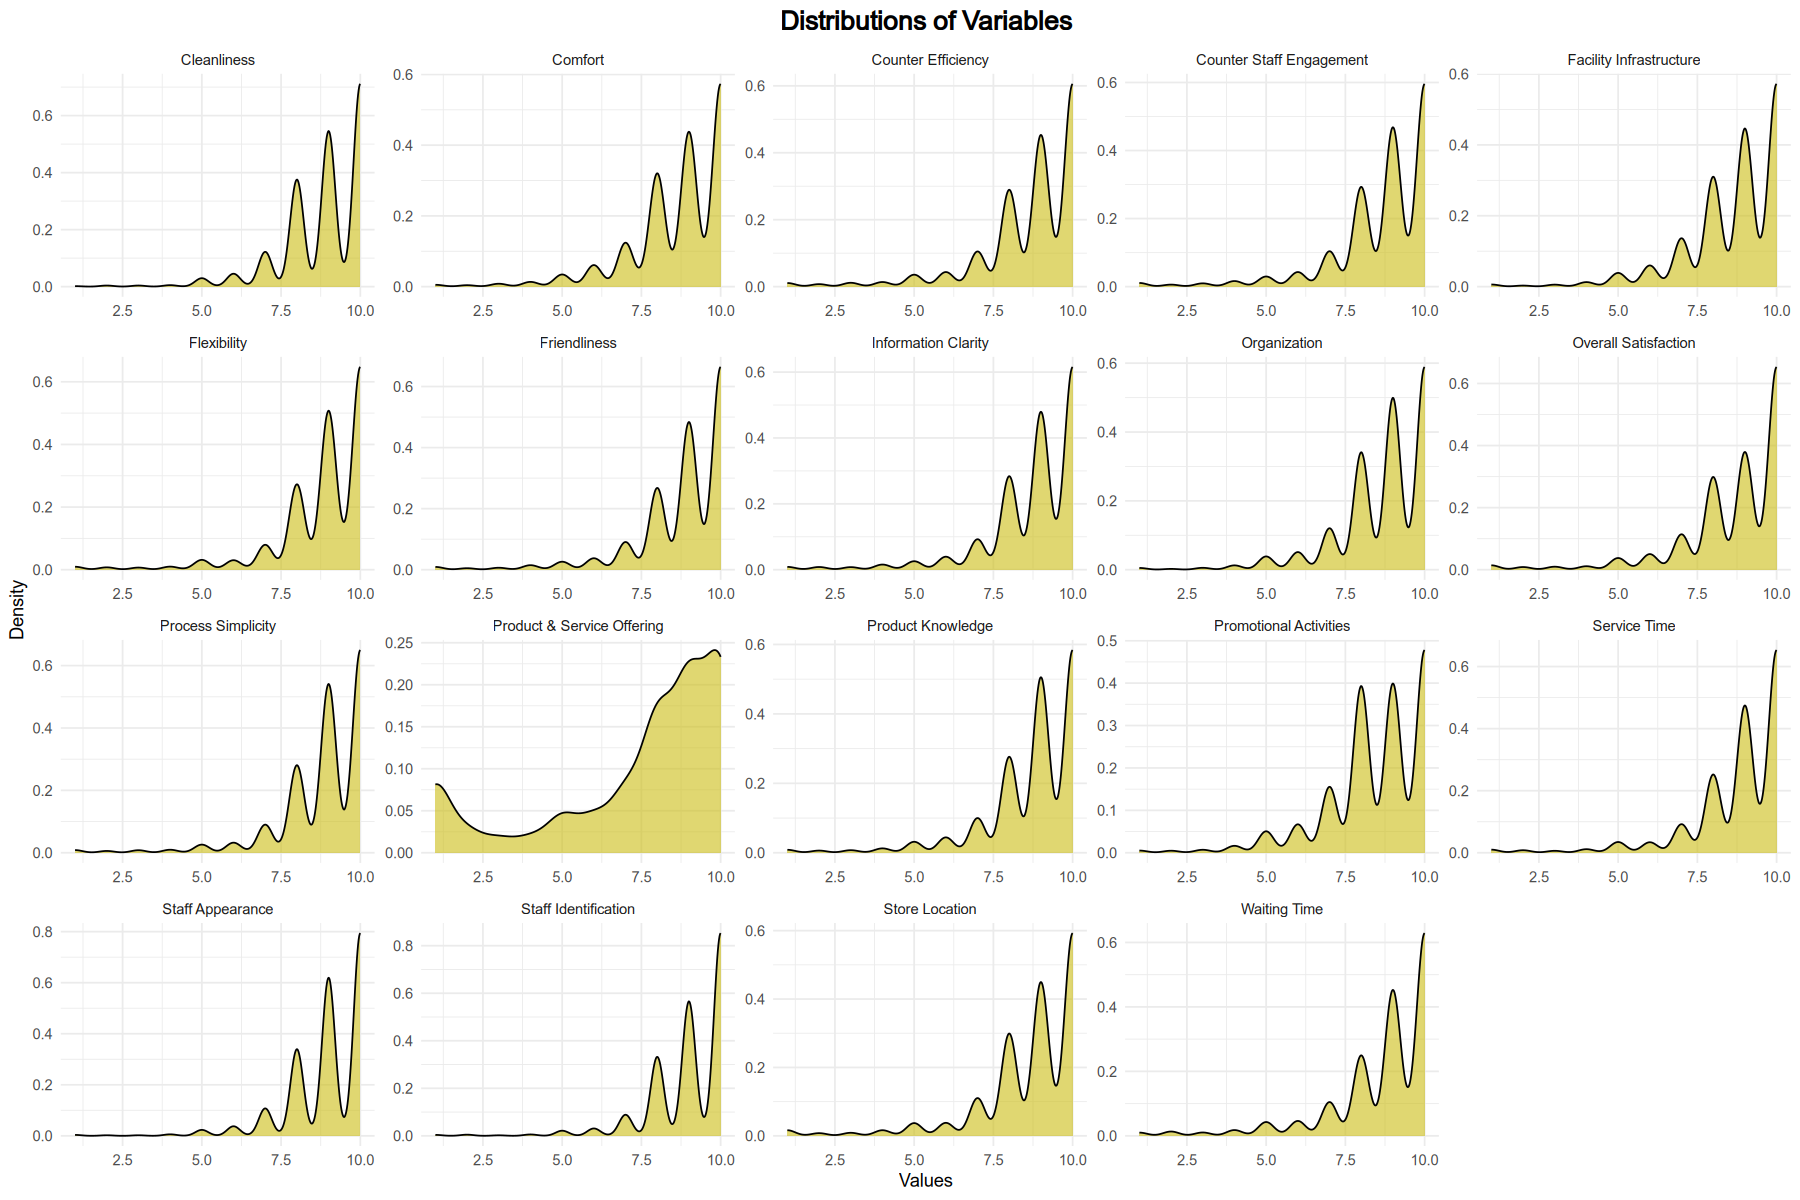

In [13]:


Data_long <- pivot_longer(Data, cols = everything(), names_to = "Variable", values_to = "Valor")

ggplot(Data_long, aes(x = Valor)) + 
  geom_density(fill = "#ccbd13", alpha = 0.6) + 
  facet_wrap(~ Variable, scales = "free") + 
  theme_minimal() + 
  labs(title = "Distributions of Variables", x = "Values", y = "Density") +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"))


## Multicollinearity

In [16]:
corr_matrix <- cor(Data, use = "pairwise.complete.obs")
corr_matrix[lower.tri(corr_matrix)] <- NA
corr_matrix

,Store Location,Counter Efficiency,Counter Staff Engagement,Friendliness,Product & Service Offering,Product Knowledge,Information Clarity,Waiting Time,Service Time,Process Simplicity,Flexibility,Promotional Activities,Organization,Cleanliness,Staff Appearance,Facility Infrastructure,Comfort,Staff Identification,Overall Satisfaction
Store Location,1,0.7806614,0.7651543,0.7103203,0.3625160,0.7058814,0.7229168,0.5866150,0.6750406,0.7083917,0.7108222,0.4227331,0.4512998,0.4382541,0.4885708,0.4133818,0.4030381,0.4579113,0.6517282
Counter Efficiency,NA,1.0000000,0.8092493,0.7663264,0.3534431,0.7252381,0.7454910,0.6650164,0.7392395,0.7341533,0.7385689,0.4145660,0.4536847,0.4482866,0.5070497,0.4209292,0.4254031,0.4704244,0.6739746
Counter Staff Engagement,NA,NA,1.0000000,0.8254344,0.3746255,0.7545825,0.7806340,0.6045895,0.7073811,0.7511388,0.7557727,0.4333213,0.4663930,0.4672946,0.5218431,0.4371160,0.4205301,0.5030770,0.6628340
Friendliness,NA,NA,NA,1.0000000,0.3392690,0.7602500,0.7614675,0.5970610,0.6914728,0.7356280,0.7295734,0.4178539,0.4566523,0.4738898,0.5397963,0.4306545,0.4233612,0.5151182,0.6468304
Product & Service Offering,NA,NA,NA,NA,1.0000000,0.3709532,0.3742871,0.3395287,0.3183413,0.3508967,0.3505799,0.2743631,0.2461710,0.2002494,0.2689895,0.2656012,0.2505444,0.2444556,0.3113040
Product Knowledge,NA,NA,NA,NA,NA,1.0000000,0.8216345,0.6092899,0.6849354,0.7570620,0.7432179,0.4346554,0.4550376,0.4630464,0.5154061,0.4472702,0.4379043,0.4969279,0.6265217
Information Clarity,NA,NA,NA,NA,NA,NA,1.0000000,0.6231468,0.7187823,0.7740135,0.7579063,0.4450608,0.4620403,0.4749994,0.5293657,0.4446435,0.4289903,0.5025213,0.6610363
Waiting Time,NA,NA,NA,NA,NA,NA,NA,1.0000000,0.7556896,0.6951927,0.6597013,0.3531620,0.3903618,0.3823081,0.4261201,0.3595098,0.3705135,0.4025964,0.5711939
Service Time,NA,NA,NA,NA,NA,NA,NA,NA,1.0000000,0.8200751,0.7837503,0.3962980,0.4375772,0.4487208,0.4981493,0.4099002,0.4227864,0.4769481,0.6575809
Process Simplicity,NA,NA,NA,NA,NA,NA,NA,NA,NA,1.0000000,0.8828252,0.4311957,0.4573445,0.4776608,0.5347046,0.4444012,0.4373250,0.5108087,0.6609352


In [17]:
library(reshape2)
corr_melted <- melt(corr_matrix, na.rm = TRUE)
corr_melted


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,Store Location,Store Location,1.0000000
20,Store Location,Counter Efficiency,0.7806614
21,Counter Efficiency,Counter Efficiency,1.0000000
39,Store Location,Counter Staff Engagement,0.7651543
40,Counter Efficiency,Counter Staff Engagement,0.8092493
41,Counter Staff Engagement,Counter Staff Engagement,1.0000000
58,Store Location,Friendliness,0.7103203
59,Counter Efficiency,Friendliness,0.7663264
60,Counter Staff Engagement,Friendliness,0.8254344


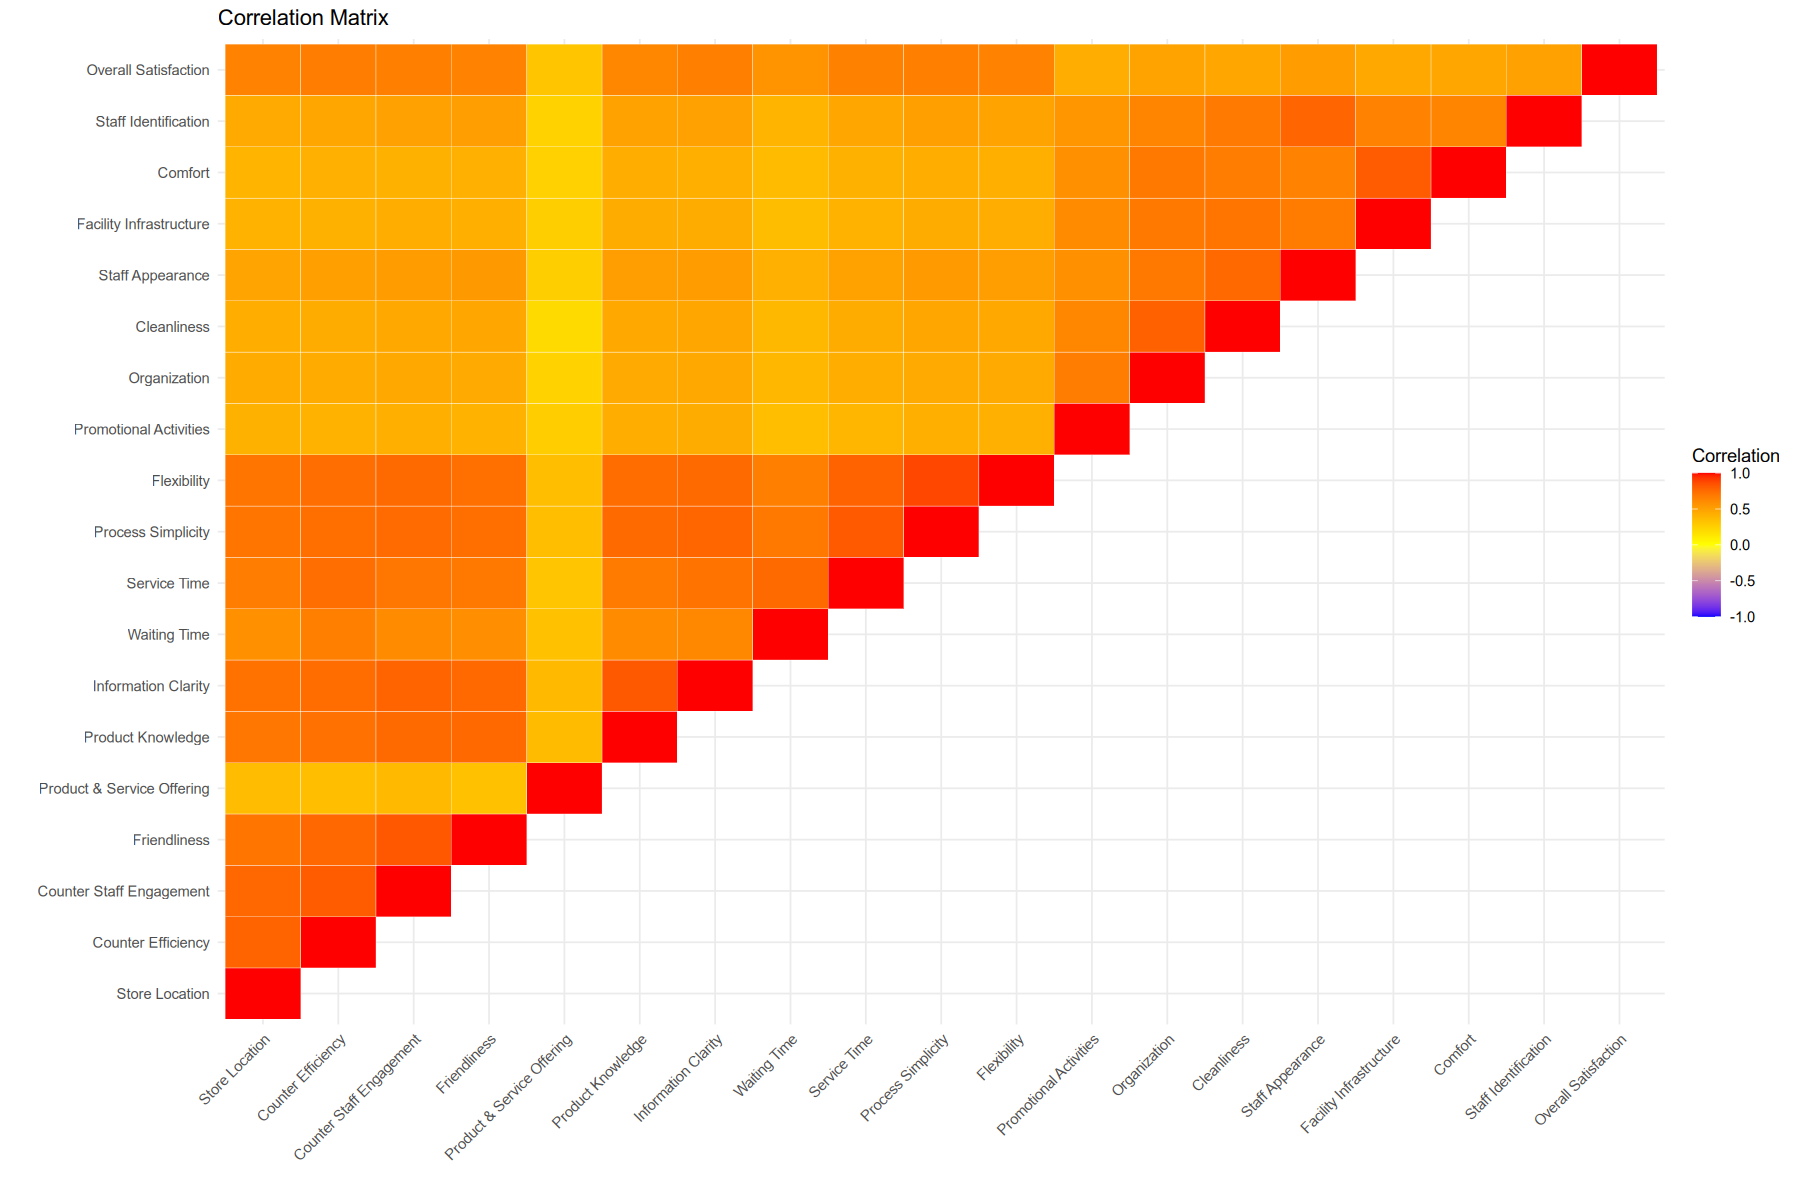

In [18]:

ggplot(corr_melted, aes(Var1, Var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", high = "red", mid = "yellow", 
                       midpoint = 0, limit = c(-1, 1), 
                       name = "Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                   hjust = 1)) +
  labs(title = "Correlation Matrix", x = "", y = "")

In [19]:
Data_scaled <- scale(Data)
Data_scaled <- as.data.frame(Data_scaled)
head(Data_scaled)

,Store Location,Counter Efficiency,Counter Staff Engagement,Friendliness,Product & Service Offering,Product Knowledge,Information Clarity,Waiting Time,Service Time,Process Simplicity,Flexibility,Promotional Activities,Organization,Cleanliness,Staff Appearance,Facility Infrastructure,Comfort,Staff Identification,Overall Satisfaction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.1973164,-0.4521814,-0.4719327,0.09466499,0.5620383,0.1584560,-0.5254781,-1.0216193,-0.5495732,-1.31072771,-1.26889292,0.9956239,0.9012182,0.8925069,0.02336919,0.8941397,0.8863135,0.7899085,-0.4286513
2,0.8049190,0.8077327,0.8167071,0.77699475,0.9134991,0.8275453,0.7994909,0.7771619,0.7641240,0.79656384,0.77476370,0.3434355,0.9012182,0.8925069,0.84732774,0.8941397,0.8863135,0.7899085,0.7848807
3,0.8049190,0.8077327,0.8167071,0.77699475,0.9134991,0.8275453,0.7994909,0.7771619,0.7641240,0.79656384,0.77476370,0.9956239,0.9012182,0.8925069,0.84732774,0.8941397,0.8863135,0.7899085,0.7848807
4,0.8049190,0.8077327,0.8167071,0.77699475,-0.8438051,0.8275453,0.7994909,0.7771619,0.7641240,0.79656384,0.77476370,-0.3087529,0.9012182,0.8925069,0.84732774,0.8941397,0.8863135,0.7899085,0.7848807
5,0.8049190,0.8077327,0.8167071,0.77699475,0.9134991,0.1584560,0.7994909,0.7771619,0.7641240,0.09413333,0.09354483,0.9956239,0.9012182,0.8925069,0.84732774,0.8941397,0.8863135,0.7899085,0.7848807
6,0.8049190,0.8077327,0.8167071,0.77699475,-0.4923442,0.8275453,0.7994909,0.7771619,0.7641240,0.79656384,0.77476370,0.9956239,0.9012182,0.8925069,0.84732774,0.8941397,0.8863135,0.7899085,0.7848807


In [20]:
library(psych())
KMO(Data_scaled)


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = Data_scaled)
Overall MSA =  0.96
MSA for each item = 
            Store Location         Counter Efficiency 
                      0.98                       0.97 
  Counter Staff Engagement               Friendliness 
                      0.97                       0.97 
Product & Service Offering          Product Knowledge 
                      0.97                       0.97 
       Information Clarity               Waiting Time 
                      0.97                       0.97 
              Service Time         Process Simplicity 
                      0.96                       0.95 
               Flexibility     Promotional Activities 
                      0.96                       0.98 
              Organization                Cleanliness 
                      0.95                       0.95 
          Staff Appearance    Facility Infrastructure 
                      0.95                       0.93 
                 

## 🔎 KMO Measure of Sampling Adequacy

### 📋 KMO Test Summary

The **Kaiser-Meyer-Olkin (KMO)** index evaluates the **suitability of the data for performing a Factor Analysis**. The overall result and per-variable values are as follows:

| Indicator                | Value |
|--------------------------|-------|
| **KMO Overall (MSA)**    | 0.96  |

---

### ✅ Interpretation of the Overall Result

A **KMO value of 0.96** indicates **excellent sampling adequacy**. According to Kaiser (1974):

- **0.90 to 1.00**: Marvelous  
- **0.80 to 0.89**: Meritorious  
- **0.70 to 0.79**: Middling  
- **0.60 to 0.69**: Mediocre  
- **0.50 to 0.59**: Miserable  
- **Below 0.50**: Unacceptable  

> **Conclusion**: The data is highly suitable for Exploratory Factor Analysis (EFA).

---

### 📊 MSA by Variable

All variables have MSA values above **0.90**, indicating that **each individual item is also suitable for factor analysis**. Key observations include:

#### Highest adequacy:
- `Overall Satisfaction` (0.99)  
- `Store Location` and `Promotional Activities` (0.98)

#### Lower (but still excellent) adequacy:
- `Facility Infrastructure` and `Comfort` (0.93)  
- `Process Simplicity`, `Organization`, `Cleanliness`, `Staff Appearance` (~0.95)

---

### 🧾 Final Conclusion

> All variables meet the required criteria to be included in the factor analysis. There is no need to remove any variable due to low sampling adequacy.


In [25]:
library(car)
library(knitr)

model <- lm(`Overall Satisfaction` ~ ., data = Data_scaled)

kable(vif(model))



|                             |        x|
|:----------------------------|--------:|
|`Store Location`             | 3.216686|
|`Counter Efficiency`         | 4.232931|
|`Counter Staff Engagement`   | 4.818678|
|Friendliness                 | 3.993847|
|`Product & Service Offering` | 1.246733|
|`Product Knowledge`          | 3.903095|
|`Information Clarity`        | 4.298612|
|`Waiting Time`               | 2.566431|
|`Service Time`               | 4.214719|
|`Process Simplicity`         | 6.210327|
|Flexibility                  | 5.281872|
|`Promotional Activities`     | 2.088459|
|Organization                 | 3.463177|
|Cleanliness                  | 3.776648|
|`Staff Appearance`           | 3.637062|
|`Facility Infrastructure`    | 3.677578|
|Comfort                      | 3.461322|
|`Staff Identification`       | 2.905829|

## 🧮 Variance Inflation Factor (VIF) Analysis

### 📋 VIF Results Summary

The Variance Inflation Factor (VIF) helps assess **multicollinearity** among the predictors in a linear regression model. A VIF value indicates how much the variance of the estimated regression coefficient is inflated due to multicollinearity.

### ✅ Interpretation Guidelines

- **VIF < 5**: Acceptable level of multicollinearity.
- **5 ≤ VIF < 10**: Moderate multicollinearity. Review for potential redundancy.
- **VIF ≥ 10**: High multicollinearity. Consider removing or combining variables.

---

### 🔍 Key Insights

- Most predictors have **VIF < 5**, indicating acceptable multicollinearity.
- Two variables have **moderate multicollinearity**:
  - `Process Simplicity` (VIF = 6.21)
  - `Flexibility` (VIF = 5.28)

> ⚠️ These two predictors might be somewhat redundant and should be reviewed further—possibly by examining correlations or factor loadings.

---

### 🧾 Conclusion

Overall, the multicollinearity is within acceptable limits for most variables, and the regression model is not severely affected. However, consider monitoring or addressing the few variables with moderate VIF values during further analysis, such as in **factor analysis** or **model simplification**.

In [27]:
y <- Data_scaled$`Overall Satisfaction` 
y


[1] -0.4286513  0.7848807  0.7848807  0.7848807  0.7848807  0.7848807
   [7]  0.1781147  0.7848807  0.7848807  0.7848807 -1.0354173  0.7848807
  [13]  0.1781147  0.7848807  0.7848807  0.7848807  0.1781147 -0.4286513
  [19]  0.7848807  0.7848807  0.1781147  0.1781147  0.1781147 -0.4286513
  [25] -0.4286513  0.1781147  0.7848807  0.7848807  0.7848807  0.7848807
  [31]  0.1781147  0.1781147  0.1781147  0.1781147  0.7848807  0.7848807
  [37]  0.7848807  0.7848807  0.7848807  0.7848807  0.7848807 -1.6421833
  [43]  0.1781147  0.7848807  0.7848807  0.7848807  0.7848807 -0.4286513
  [49]  0.1781147  0.1781147  0.7848807  0.7848807 -1.0354173  0.1781147
  [55]  0.1781147  0.1781147 -0.4286513 -0.4286513  0.7848807  0.7848807
  [61]  0.7848807  0.7848807  0.1781147  0.7848807  0.7848807  0.7848807
  [67]  0.7848807  0.7848807 -0.4286513  0.7848807  0.7848807  0.7848807
  [73]  0.7848807  0.7848807  0.7848807  0.7848807  0.1781147  0.7848807
  [79] -0.4286513  0.7848807  0.7848807  0.7848807  0.7848807  0.7848807
  [85]  0.7848807  0.7848807  0.7848807  0.7848807  0.1781147 -2.2489493
  [91]  0.7848807 -2.2489493  0.7848807  0.7848807  0.7848807  0.7848807
  [97]  0.7848807  0.7848807  0.7848807  0.7848807  0.7848807  0.7848807
 [103]  0.7848807  0.7848807  0.7848807  0.7848807  0.7848807  0.7848807
 [109]  0.7848807  0.7848807  0.1781147 -1.6421833  0.7848807  0.7848807
 [115]  0.7848807  0.7848807  0.1781147  0.7848807  0.7848807 -1.0354173
 [121]  0.7848807  0.7848807  0.7848807  0.1781147  0.7848807  0.7848807
 [127]  0.7848807  0.7848807  0.7848807 -4.6760134  0.7848807  0.7848807
 [133]  0.7848807  0.7848807 -1.0354173  0.7848807  0.1781147  0.7848807
 [139]  0.7848807  0.7848807  0.7848807  0.7848807 -0.4286513  0.7848807
 [145]  0.1781147 -0.4286513 -0.4286513 -1.6421833  0.1781147  0.7848807
 [151]  0.1781147 -0.4286513  0.7848807 -0.4286513  0.7848807  0.7848807
 [157] -1.0354173  0.7848807  0.7848807  0.1781147  0.7848807 -0.4286513
 [163]  0.1781147  0.7848807  0.7848807 -0.4286513 -2.2489493  0.7848807
 [169]  0.7848807  0.7848807  0.7848807 -1.0354173  0.1781147  0.1781147
 [175]  0.7848807  0.1781147  0.1781147  0.1781147  0.7848807  0.7848807
 [181]  0.1781147  0.1781147  0.7848807  0.7848807  0.7848807  0.7848807
 [187] -1.0354173 -0.4286513  0.1781147  0.7848807  0.1781147 -1.0354173
 [193] -1.0354173  0.1781147  0.7848807 -0.4286513  0.7848807  0.7848807
 [199]  0.7848807  0.7848807 -0.4286513 -0.4286513  0.1781147  0.1781147
 [205]  0.7848807  0.7848807 -0.4286513  0.7848807  0.1781147  0.1781147
 [211]  0.1781147 -1.0354173  0.1781147  0.7848807 -0.4286513  0.1781147
 [217] -1.6421833 -1.6421833 -0.4286513 -0.4286513  0.7848807  0.7848807
 [223]  0.7848807  0.7848807  0.7848807  0.7848807  0.7848807  0.7848807
 [229]  0.7848807  0.7848807 -1.0354173  0.7848807  0.7848807  0.7848807
 [235] -1.0354173 -0.4286513  0.7848807  0.7848807  0.7848807 -1.0354173
 [241]  0.7848807  0.7848807  0.7848807  0.7848807  0.7848807  0.7848807
 [247]  0.7848807 -1.0354173  0.7848807  0.7848807  0.7848807  0.7848807
 [253]  0.7848807  0.7848807  0.7848807  0.7848807  0.1781147  0.7848807
 [259] -1.0354173  0.7848807 -0.4286513  0.7848807  0.7848807  0.7848807
 [265]  0.7848807  0.7848807  0.7848807  0.1781147 -0.4286513  0.1781147
 [271] -1.0354173 -2.2489493  0.1781147  0.1781147 -1.0354173  0.7848807
 [277] -0.4286513 -0.4286513  0.7848807  0.7848807  0.7848807  0.7848807
 [283] -0.4286513  0.7848807  0.1781147  0.7848807 -0.4286513  0.7848807
 [289] -2.2489493 -0.4286513  0.1781147  0.1781147  0.1781147  0.1781147
 [295]  0.7848807  0.7848807  0.1781147 -0.4286513  0.7848807 -1.0354173
 [301] -1.6421833  0.1781147  0.7848807  0.7848807 -1.0354173  0.7848807
 [307] -1.0354173  0.7848807  0.7848807 -0.4286513 -1.0354173  0.7848807
 [313] -0.4286513  0.7848807  0.7848807  0.7848807 -0.4286513  0.7848807
 [319]  0.7848807  0.7848807  0.7848807 -0.4286513 -0.4286513 -0.4286513
 [325]  0.7848807 -0.4286513  0.7848807 -1.0354173 -0.4286513

In [ ]:
x <- Data_scaled[, -((ncol(Data_scaled) - 1):ncol(Data_scaled))]
head(x, 10)

,Store Location,Counter Efficiency,Counter Staff Engagement,Friendliness,Product & Service Offering,Product Knowledge,Information Clarity,Waiting Time,Service Time,Process Simplicity,Flexibility,Promotional Activities,Organization,Cleanliness,Staff Appearance,Facility Infrastructure,Comfort
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.1973164,-0.4521814,-0.4719327,0.09466499,0.5620383,0.1584560,-0.5254781,-1.0216193,-0.5495732,-1.31072771,-1.26889292,0.9956239,0.9012182,0.8925069,0.02336919,0.8941397,0.8863135
2,0.8049190,0.8077327,0.8167071,0.77699475,0.9134991,0.8275453,0.7994909,0.7771619,0.7641240,0.79656384,0.77476370,0.3434355,0.9012182,0.8925069,0.84732774,0.8941397,0.8863135
3,0.8049190,0.8077327,0.8167071,0.77699475,0.9134991,0.8275453,0.7994909,0.7771619,0.7641240,0.79656384,0.77476370,0.9956239,0.9012182,0.8925069,0.84732774,0.8941397,0.8863135
4,0.8049190,0.8077327,0.8167071,0.77699475,-0.8438051,0.8275453,0.7994909,0.7771619,0.7641240,0.79656384,0.77476370,-0.3087529,0.9012182,0.8925069,0.84732774,0.8941397,0.8863135
5,0.8049190,0.8077327,0.8167071,0.77699475,0.9134991,0.1584560,0.7994909,0.7771619,0.7641240,0.09413333,0.09354483,0.9956239,0.9012182,0.8925069,0.84732774,0.8941397,0.8863135
6,0.8049190,0.8077327,0.8167071,0.77699475,-0.4923442,0.8275453,0.7994909,0.7771619,0.7641240,0.79656384,0.77476370,0.9956239,0.9012182,0.8925069,0.84732774,0.8941397,0.8863135
7,0.8049190,0.1777756,-1.1162526,-0.58766477,-0.8438051,-1.8488119,-1.8504472,0.7771619,0.7641240,0.79656384,0.77476370,0.3434355,0.1932616,0.1082501,0.02336919,-1.1350603,-1.1308959
8,0.1973164,0.1777756,0.1723872,0.09466499,0.5620383,0.8275453,0.7994909,0.7771619,0.7641240,0.79656384,0.77476370,0.9956239,0.9012182,0.8925069,0.84732774,0.8941397,0.8863135
9,0.8049190,0.8077327,0.8167071,0.77699475,0.2105775,0.1584560,-0.5254781,0.7771619,0.7641240,0.09413333,0.09354483,0.3434355,0.1932616,0.1082501,0.02336919,0.2177397,0.2139103


# Exploratory Factor Analysis

In [29]:
aucor <- eigen(cor(x)) 
aucor


eigen() decomposition
$values
 [1] 9.9830369 2.2187133 0.8340491 0.5913588 0.4832269 0.4198056 0.3934994
 [8] 0.3250108 0.2856554 0.2709565 0.2028825 0.1985517 0.1866611 0.1784033
[15] 0.1650313 0.1526880 0.1104695

$vectors
            [,1]        [,2]          [,3]        [,4]        [,5]         [,6]
 [1,] -0.2569654 -0.15988743  0.0002888053  0.25329908 -0.02339730 -0.127618911
 [2,] -0.2670175 -0.17883335 -0.0469226619  0.11825294  0.02669130 -0.072829287
 [3,] -0.2706539 -0.17008774 -0.0221912196  0.30106336  0.04762108 -0.012956228
 [4,] -0.2653696 -0.15546357 -0.0672022821  0.29509756  0.09072548  0.081809805
 [5,] -0.1401894 -0.06114628  0.9669882874 -0.04424310  0.01959546  0.161951764
 [6,] -0.2655383 -0.15191725 -0.0064603539  0.20367241  0.08730560 -0.072370731
 [7,] -0.2701766 -0.15943759 -0.0170166457  0.18003738  0.03007101 -0.029053548
 [8,] -0.2329663 -0.17062613 -0.0106983577 -0.63788211 -0.13268898 -0.003613904
 [9,] -0.2615938 -0.17815177 -0.1156170131 -0.40647750 

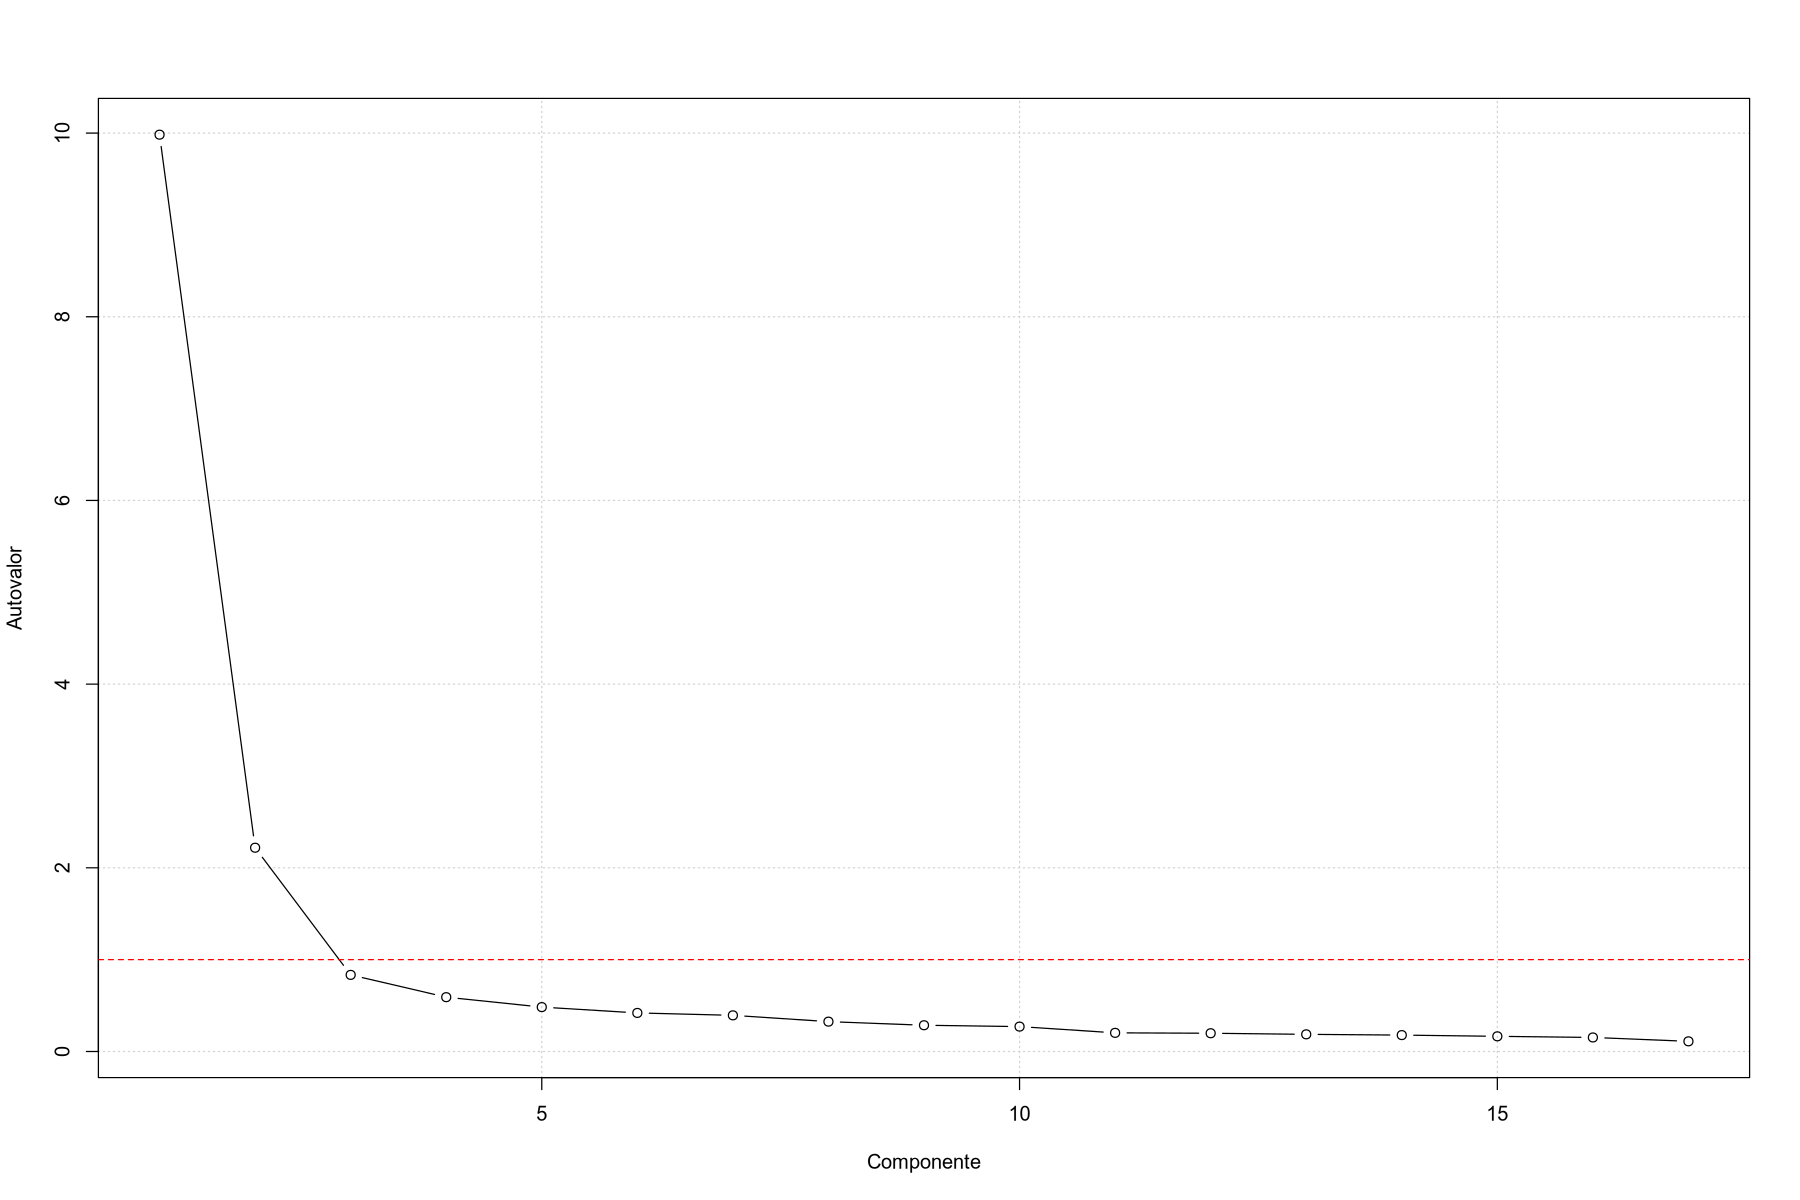

In [ ]:
plot(aucor$values, type = "b", xlab = "Component", ylab = "Autovalue",
     bg = "white", 
     col.axis = "black", col.lab = "black", col.main = "black", col.sub = "black",
     col = "black", 
     panel.first = grid())  




In [37]:
AutoVal <- round(aucor$values,5) %>% as.data.frame()
AutoVal

.
<dbl>
9.98304
2.21871
0.83405
0.59136
0.48323
0.41981
0.39350
0.32501
0.28566


In [38]:
VarExpFact <- round(aucor$values/sum(aucor$values)*100,5) %>% as.data.frame()
VarExpFactAcum <- round(cumsum(aucor$values/sum(aucor$values)*100),5) %>% as.data.frame()
VarExpFactAcum

.
<dbl>
58.72375
71.77500
76.68117
80.15975
83.00226
85.47171
87.78641
89.69824
91.37857


In [39]:
CantFactor <- cbind(AutoVal,VarExpFact,VarExpFactAcum) %>% as.data.frame()
colnames(CantFactor) <- c("AUTO VALUES","EXPLAINED VARIANCE","CUMULATED VARIANCE")
CantFactor

AUTO VALUES,EXPLAINED VARIANCE,CUMULATED VARIANCE
<dbl>,<dbl>,<dbl>
9.98304,58.72375,58.72375
2.21871,13.05125,71.77500
0.83405,4.90617,76.68117
0.59136,3.47858,80.15975
0.48323,2.84251,83.00226
0.41981,2.46944,85.47171
0.39350,2.31470,87.78641
0.32501,1.91183,89.69824
0.28566,1.68033,91.37857


In [41]:
Factorial <- factanal(x,factor = 2,rotation = "varimax",scores = "regression")
Factorial


Call:
factanal(x = x, factors = 2, scores = "regression", rotation = "varimax")

Uniquenesses:
            Store Location         Counter Efficiency 
                     0.317                      0.247 
  Counter Staff Engagement               Friendliness 
                     0.222                      0.263 
Product & Service Offering          Product Knowledge 
                     0.829                      0.267 
       Information Clarity               Waiting Time 
                     0.234                      0.447 
              Service Time         Process Simplicity 
                     0.277                      0.195 
               Flexibility     Promotional Activities 
                     0.214                      0.465 
              Organization                Cleanliness 
                     0.256                      0.240 
          Staff Appearance    Facility Infrastructure 
                     0.315                      0.278 
                   Comfo

In [42]:
Fac1 <- c(Factorial$loadings[,"Factor1"]) %>% as.data.frame()
Fac2 <- c(Factorial$loadings[,"Factor2"]) %>% as.data.frame()


Cargas <- data.frame(Fac1,Fac2)
colnames(Cargas) <- c("Fac1","Fac2")
Cargas

,Fac1,Fac2
,<dbl>,<dbl>
Store Location,0.7815020,0.2689678
Counter Efficiency,0.8265961,0.2647796
Counter Staff Engagement,0.8368582,0.2778319
Friendliness,0.8087531,0.2873945
Product & Service Offering,0.3739164,0.1765314
Product Knowledge,0.8053075,0.2903396
Information Clarity,0.8264140,0.2888871
Waiting Time,0.7089315,0.2245476
Service Time,0.8099423,0.2583186


In [44]:
scores <- Factorial$scores %>% as.data.frame()
scores

,Factor1,Factor2
,<dbl>,<dbl>
1,-1.03176643,1.24270908
2,0.70302292,0.76275236
3,0.68331683,0.83596410
4,0.69590961,0.68868023
5,0.37222408,0.93178373
6,0.66186131,0.83527578
7,-0.08378153,-0.36109482
8,0.35374996,0.93357668
9,0.45712971,0.05602654


#  Cluster Analysis with Kmeans

#

# Elbow Method

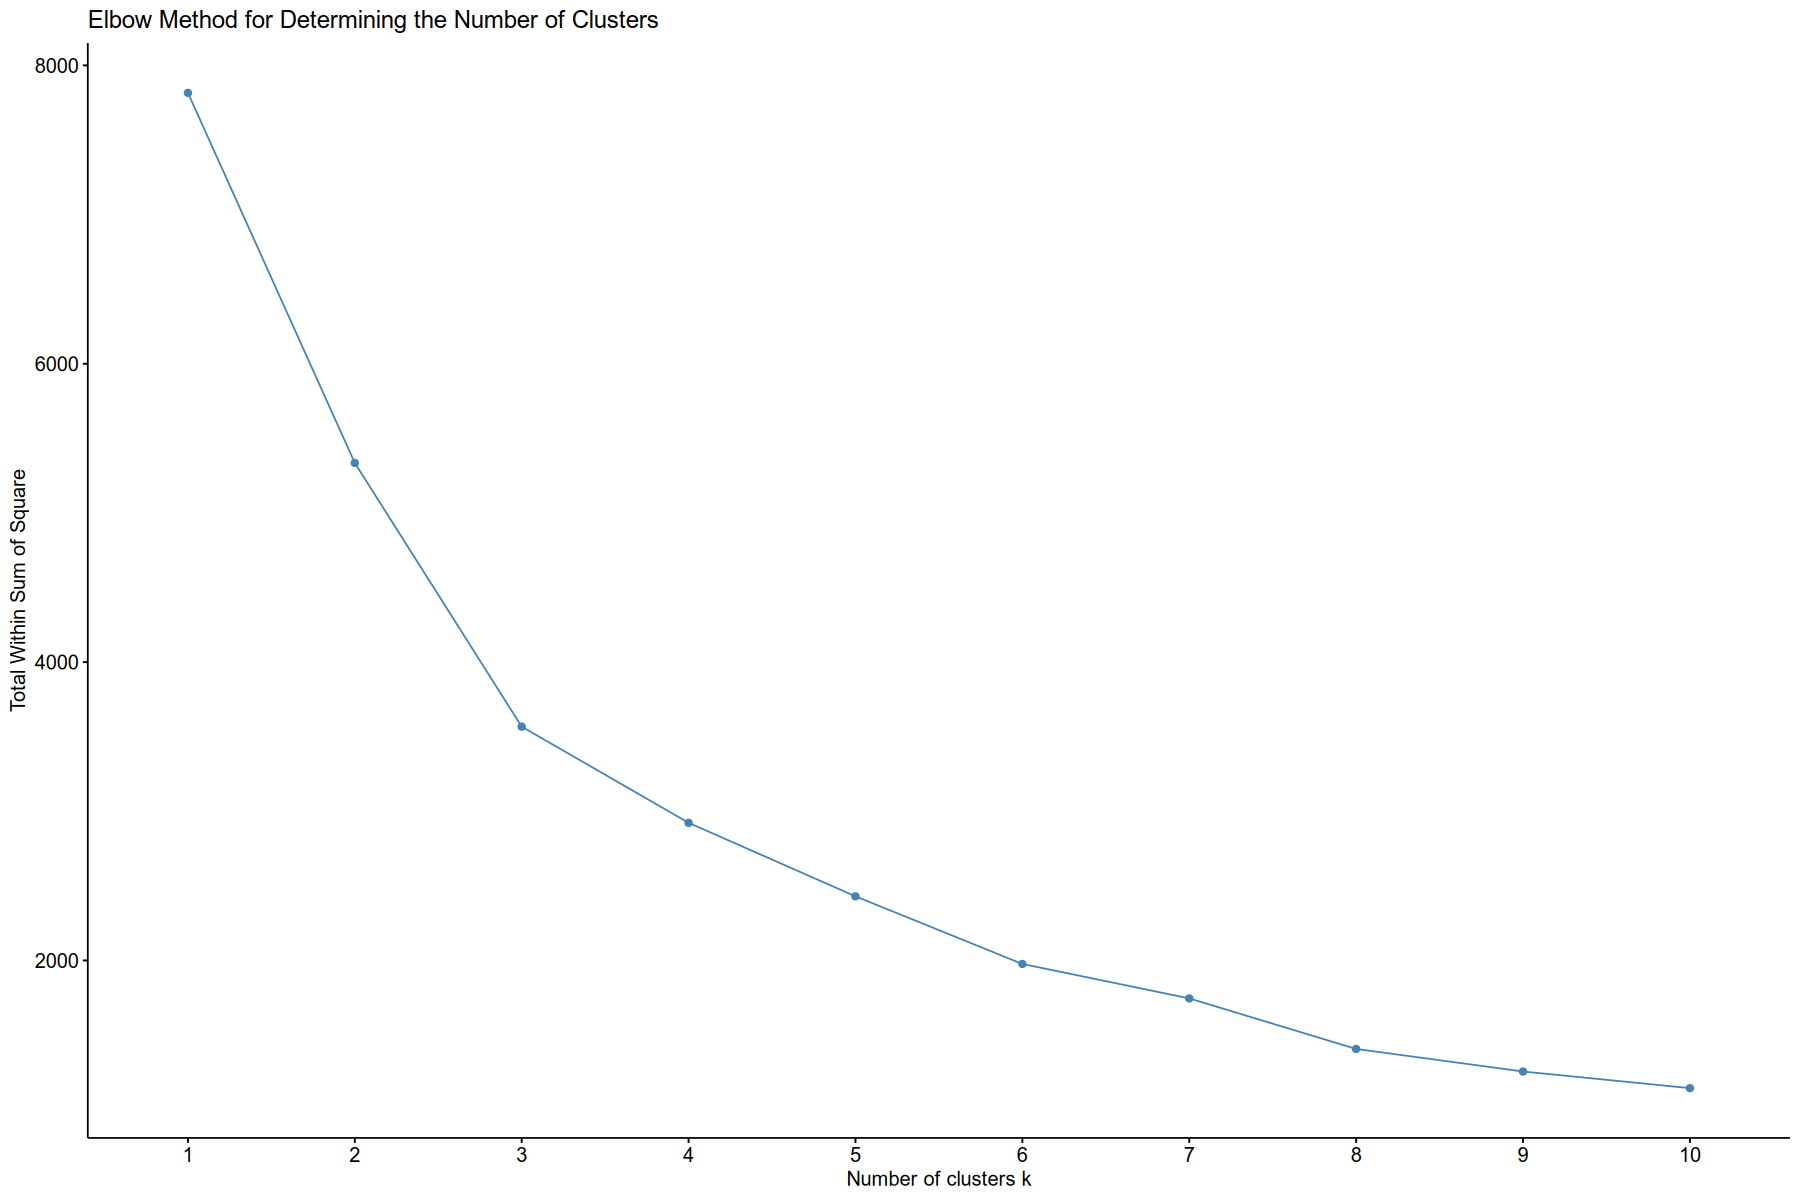

In [45]:
library(factoextra) 
fviz_nbclust(scores, kmeans, method = "wss") + 
  ggtitle("Elbow Method for Determining the Number of Clusters")

In [46]:
set.seed(123)  
kmeans_codo <- kmeans(scores, centers = 3)
kmeans_codo

K-means clustering with 3 clusters of sizes 1137, 361, 2733

Cluster means:
     Factor1    Factor2
1  0.1767037 -1.0873517
2 -2.3650059 -0.2998412
3  0.2388785  0.4919728

Clustering vector:
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   3    3    3    3    3    3    1    3    3    3    3    3    3    3    3    3 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   3    1    3    3    1    3    3    1    3    3    3    3    3    3    3    3 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   3    3    1    1    3    3    3    3    3    2    3    3    3    3    3    3 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   3    3    3    3    2    3    3    3    1    1    3    3    3    3    2    3 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
   3    3    1    3    3    3    3    3    3    3    3    3    3    3    2    3

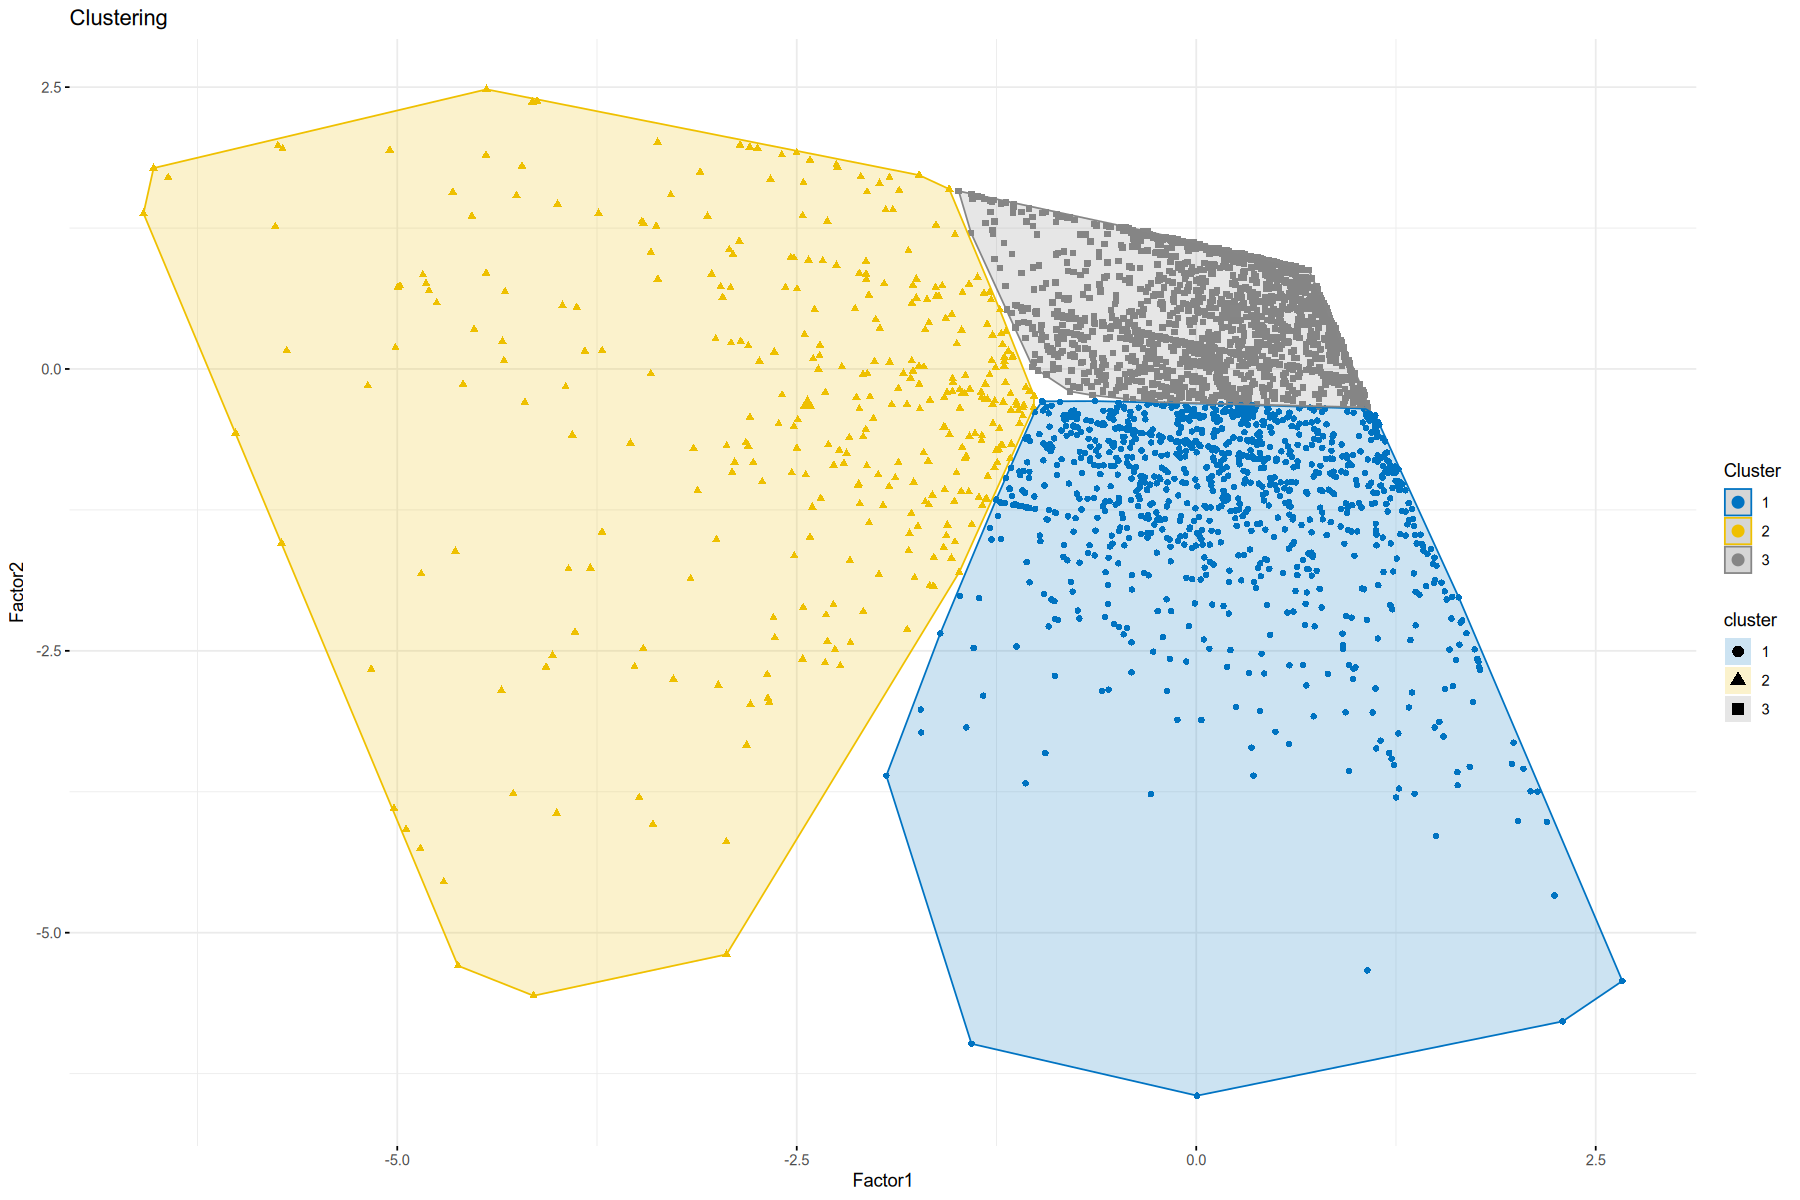

In [47]:
library(factoextra)

fviz_cluster(kmeans_codo, data = scores, geom = "point", 
             ellipse.type = "convex", 
             ggtheme = theme_minimal(),
             palette = "jco") +
  ggtitle("Clustering") +
  labs(color = "Cluster")

In [57]:
Data_clusters <- Data_scaled %>%
  mutate(cluster = as.factor(kmeans_codo$cluster))

head(Data_clusters_codo)

,Store Location,Counter Efficiency,Counter Staff Engagement,Friendliness,Product & Service Offering,Product Knowledge,Information Clarity,Waiting Time,Service Time,Process Simplicity,Flexibility,Promotional Activities,Organization,Cleanliness,Staff Appearance,Facility Infrastructure,Comfort,Staff Identification,Overall Satisfaction,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.1973164,-0.4521814,-0.4719327,0.09466499,0.5620383,0.1584560,-0.5254781,-1.0216193,-0.5495732,-1.31072771,-1.26889292,0.9956239,0.9012182,0.8925069,0.02336919,0.8941397,0.8863135,0.7899085,-0.4286513,3
2,0.8049190,0.8077327,0.8167071,0.77699475,0.9134991,0.8275453,0.7994909,0.7771619,0.7641240,0.79656384,0.77476370,0.3434355,0.9012182,0.8925069,0.84732774,0.8941397,0.8863135,0.7899085,0.7848807,3
3,0.8049190,0.8077327,0.8167071,0.77699475,0.9134991,0.8275453,0.7994909,0.7771619,0.7641240,0.79656384,0.77476370,0.9956239,0.9012182,0.8925069,0.84732774,0.8941397,0.8863135,0.7899085,0.7848807,3
4,0.8049190,0.8077327,0.8167071,0.77699475,-0.8438051,0.8275453,0.7994909,0.7771619,0.7641240,0.79656384,0.77476370,-0.3087529,0.9012182,0.8925069,0.84732774,0.8941397,0.8863135,0.7899085,0.7848807,3
5,0.8049190,0.8077327,0.8167071,0.77699475,0.9134991,0.1584560,0.7994909,0.7771619,0.7641240,0.09413333,0.09354483,0.9956239,0.9012182,0.8925069,0.84732774,0.8941397,0.8863135,0.7899085,0.7848807,3
6,0.8049190,0.8077327,0.8167071,0.77699475,-0.4923442,0.8275453,0.7994909,0.7771619,0.7641240,0.79656384,0.77476370,0.9956239,0.9012182,0.8925069,0.84732774,0.8941397,0.8863135,0.7899085,0.7848807,3


In [59]:
resumen_clusters <- Data_clusters %>%
  group_by(cluster) %>%
  summarise(across(everything(), list(media = ~mean(.x, na.rm = TRUE))))

resumen_clusters

cluster,Store Location_media,Counter Efficiency_media,Counter Staff Engagement_media,Friendliness_media,Product & Service Offering_media,Product Knowledge_media,Information Clarity_media,Waiting Time_media,Service Time_media,Process Simplicity_media,Flexibility_media,Promotional Activities_media,Organization_media,Cleanliness_media,Staff Appearance_media,Facility Infrastructure_media,Comfort_media,Staff Identification_media,Overall Satisfaction_media
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.1484345,-0.1203043,-0.1290888,-0.1255769,-0.1279007,-0.1540210,-0.1304346,-0.1293479,-0.1214950,-0.1375390,-0.1389204,-0.7309258,-0.9356085,-0.9132841,-0.7773997,-0.9369589,-0.9262772,-0.6680132,-0.2904346
2,-1.9755780,-2.1151982,-2.1478784,-2.0846320,-0.9596606,-2.0489826,-2.1128718,-1.7956102,-2.0852524,-2.1941168,-2.1822168,-0.9103560,-0.8716149,-0.8780453,-1.0470922,-0.8034182,-0.8198396,-1.0270420,-1.7984970
3,0.3227053,0.3294448,0.3374160,0.3276008,0.1799709,0.3347254,0.3333519,0.2909930,0.3259846,0.3470392,0.3460420,0.4243327,0.5043688,0.4959306,0.4617284,0.4959225,0.4936478,0.4135723,0.3583906


# Customer Segment Analysis

## 📊 Cluster Analysis – Elbow Method and Customer Profiles

## Segment 1: Moderately Dissatisfied Customers  
*(Focus on Environment Issues)*  

📉 **Overall Satisfaction**: -0.29 (below average)  

### 🔴 Critical Pain Points:
| Factor | Value | 
|--------|-------|
| Organization | -0.94 | 
| Cleanliness | -0.91 |
| Staff Appearance | -0.94 |
| Facility Infrastructure | -0.93 |

### 🟡 Relatively Better Aspects:
| Factor | Value | 
|--------|-------|
| Store Location | -0.15 |
| Counter Efficiency | -0.12 |
| Service Time | -0.12 |

---

## Segment 2: Highly Dissatisfied Customers  
*(General Experience Problems)*  

📉 **Overall Satisfaction**: -1.80 (significantly below average)  

### 🔴 Extreme Pain Points:
| Factor | Value | 
|--------|-------|
| Counter Efficiency | -2.12 | 
| Counter Staff Engagement | -2.15 |
| Friendliness | -2.08 |
| Product Knowledge | -2.05 |

> ⚠️ **Critical Insight**:  
> All evaluated aspects are significantly  
> below average (-1.5 to -2.15)

---

## Segment 3: Satisfied Customers  
*(Excellent Overall Experience)*  

📈 **Overall Satisfaction**: +0.36 (above average)  

### 🟢 Key Strengths:
| Factor | Value | 
|--------|-------|
| Process Simplicity | +0.35 | 
| Flexibility | +0.35 |
| Organization | +0.50 |
| Cleanliness | +0.50 |
| Facility Infrastructure | +0.49 |


> ✅ **Positive Insight**:  
> All aspects exceed the average (+0.35 to +0.50)

---

### 📌 Conclusion

Cluster analysis enabled the identification of three distinct customer segments based on satisfaction levels. This information is valuable for designing targeted improvement strategies, loyalty programs, and corrective actions.


In [64]:
anova_cluster <- aov(`Overall Satisfaction`  ~ cluster, data = Data_clusters)
summary(anova_cluster)

              Df Sum Sq Mean Sq F value Pr(>F)    
cluster        2   1615   807.3    1305 <2e-16 ***
Residuals   4228   2615     0.6                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## 📊 ANOVA – Cluster Effect on Overall Satisfaction

To validate whether the identified clusters differ significantly in terms of overall customer satisfaction, a one-way ANOVA was conducted.

### 🔍 ANOVA Summary Table

| Source      | Df   | Sum Sq | Mean Sq | F value | Pr(>F)    |
|-------------|------|--------|---------|---------|-----------|
| Cluster     | 2    | 1615   | 807.3   | 1305    | < 2e-16 *** |
| Residuals   | 4228 | 2615   | 0.6     |         |           |

> **Significance codes**:  
> `***` p < 0.001 — highly significant  
> `**` p < 0.01  
> `*` p < 0.05  
> `.` p < 0.1  
> ` ` not significant

---

### ✅ Interpretation

- The **cluster variable is highly significant** in explaining differences in overall customer satisfaction (**p < 2e-16**).
- The **F-statistic (1305)** is extremely high, indicating that the **between-group variance** is much larger than the **within-group variance**.
- This confirms that the clusters **represent truly distinct segments** with different satisfaction profiles.

---

### 📌 Conclusion

The clustering structure is statistically validated. We can confidently use these segments to guide strategic decisions, such as tailored interventions or marketing campaigns for each customer group.


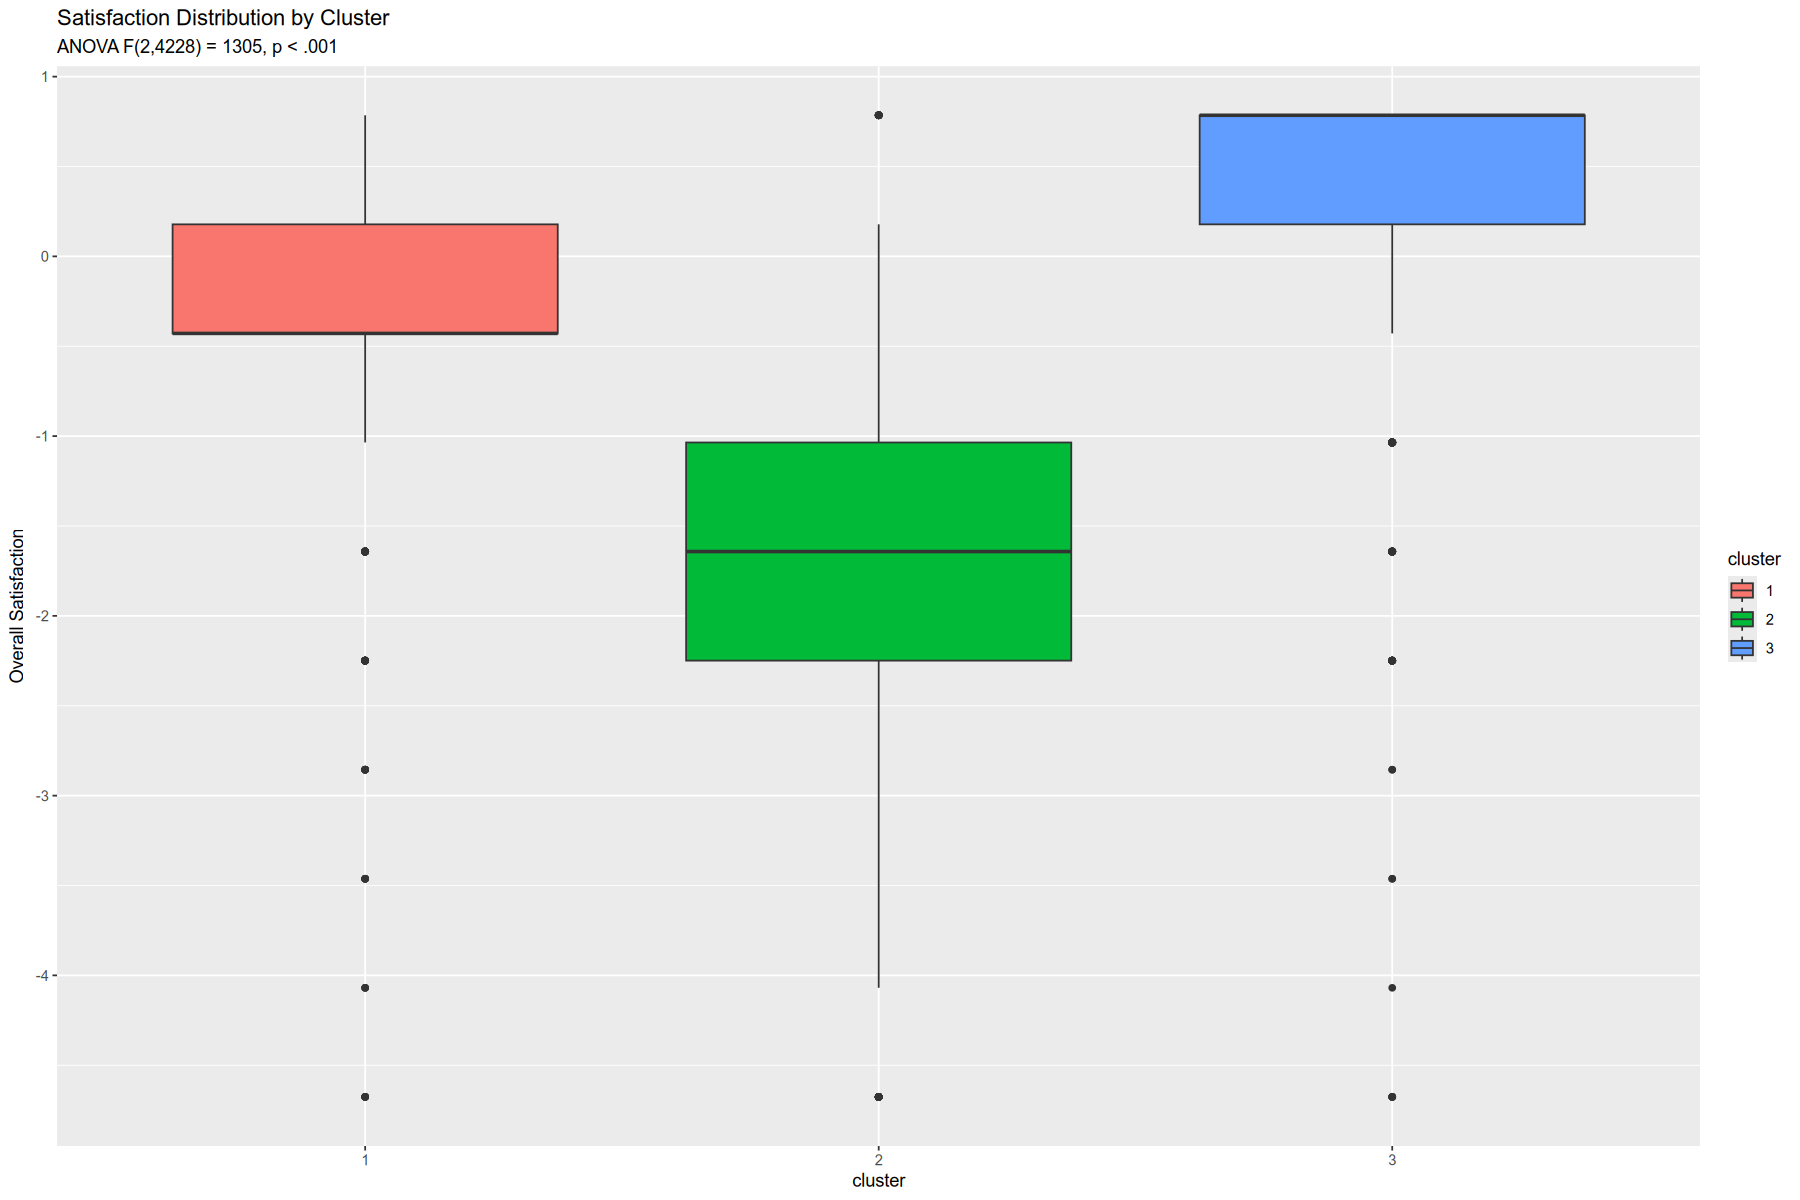

In [66]:
ggplot(Data_clusters, 
       aes(x = cluster, y = `Overall Satisfaction`, fill = cluster)) +
  geom_boxplot() +
  labs(title = "Satisfaction Distribution by Cluster",
       subtitle = "ANOVA F(2,4228) = 1305, p < .001")

In [67]:
intra_cluster_error <- sum(kmeans_codo$withinss)

total_ss <- kmeans_codo$totss
inter_cluster_error <- total_ss - intra_cluster_error

cat("Intra-cluster error :", intra_cluster_error, "\n")
cat("Inter-cluster error :", inter_cluster_error, "\n")

Intra-cluster error : 3567.213 
Inter-cluster error : 4248.876 


### 📊 Interpretation

The **intra-cluster error** (`3567.213`) is relatively low, suggesting that data points within each cluster are compact and close to their centroids.

The **inter-cluster error** (`4248.876`) is higher than the intra-cluster error, indicating that the clusters are well-separated from each other.

The **explained variance ratio** is calculated as:

$$
\text{Explained Variance} = \frac{\text{Inter-cluster Error}}{\text{Total SS}} = \frac{4248.876}{7816.089} \approx 0.5435
$$


This means that the clustering model explains approximately **54.35%** of the total variability in the data.

> ✅ These results support the conclusion that the clustering model provides a **meaningful segmentation** of the customer base.


In [76]:
library(MASS)
model_lda <- lda(cluster ~.,data = Data_clusters)
model_lda

Call:
lda(cluster ~ ., data = Data_clusters)

Prior probabilities of groups:
         1          2          3 
0.26873080 0.08532262 0.64594658 

Group means:
  `Store Location` `Counter Efficiency` `Counter Staff Engagement` Friendliness
1       -0.1484345           -0.1203043                 -0.1290888   -0.1255769
2       -1.9755780           -2.1151982                 -2.1478784   -2.0846320
3        0.3227053            0.3294448                  0.3374160    0.3276008
  `Product & Service Offering` `Product Knowledge` `Information Clarity`
1                   -0.1279007          -0.1540210            -0.1304346
2                   -0.9596606          -2.0489826            -2.1128718
3                    0.1799709           0.3347254             0.3333519
  `Waiting Time` `Service Time` `Process Simplicity` Flexibility
1     -0.1293479     -0.1214950           -0.1375390  -0.1389204
2     -1.7956102     -2.0852524           -2.1941168  -2.1822168
3      0.2909930      0.3259846   

# Interpretation of LDA Results

### Prior Probabilities of Groups
- Group 1 represents about 26.9% of the data.
- Group 2 is the smallest group with about 8.5%.
- Group 3 is the largest group, making up around 64.6%.

This reflects the relative sizes of the clusters in the dataset.

---

### Group Means
- Group 2 shows consistently low (negative) mean values across almost all variables, indicating these observations score lower than average on the measured features.
- Group 3 exhibits positive means, meaning this group tends to have higher-than-average scores on most variables.
- Group 1 generally falls near the center or slightly below average, between Groups 2 and 3.

This suggests Group 2 can be characterized by poorer performance or lower satisfaction, Group 3 by higher performance or satisfaction, and Group 1 somewhere intermediate.

---

### Coefficients of Linear Discriminants (LD1 and LD2)
- Variables such as **Comfort**, **Flexibility**, and **Organization** have the largest positive coefficients in LD1, meaning they strongly contribute to differentiating the groups along the first discriminant axis.
- LD2 contrasts variables like **Organization**, **Facility Infrastructure**, and **Comfort** with large negative coefficients, indicating a second dimension of group separation based on these features.
- These coefficients show how each variable weights in constructing the linear functions that best separate the groups.

---

### Proportion of Variance Explained
- LD1 explains about 63.5% of the discrimination between groups.
- LD2 explains the remaining 36.5%.
- Together, LD1 and LD2 account for 100% of the variance in group separation, since with 3 groups there are 2 discriminant functions.

---

### Summary
The LDA model effectively separates the three clusters primarily along two discriminant axes. The first axis (LD1) captures most of the variation, heavily influenced by variables related to comfort, flexibility, and organization. The second axis (LD2) provides additional separation by contrasting infrastructure-related variables. The groups differ distinctly in their mean profiles, indicating clear cluster characteristics in the multivariate space.



In [82]:
predictions <- predict(modelo_lda)

Confussion_Matrix <- table(Predict = predictions$class, Real = Data_clusters$cluster)

error <- 1 - sum(diag(tabla_confusion)) / sum(tabla_confusion)

cat("Confussion Matrix:\n")
print(Confussion_Matrix)
cat("\n Error Rate:", round(error * 100, 2), "%\n")

Confussion Matrix:
       Real
Predict    1    2    3
      1  935   22    1
      2    0  288    0
      3  202   51 2732

 Error Rate: 6.52 %


# LDA Classification Performance

### Confusion Matrix

| Predict \ Real |   1  |  2  |  3   |
|---------------|-------|-----|-------|
| **1**         | 935   | 22  | 1     |
| **2**         | 0     | 288 | 0     |
| **3**         | 202   | 51  | 2732  |

- The diagonal elements represent correctly classified instances for each cluster.
- For example, 935 observations from cluster 1 were correctly predicted as 1.
- Some misclassifications occurred:
  - 22 observations from cluster 2 were incorrectly predicted as cluster 1.
  - 202 observations from cluster 1 were misclassified as cluster 3.
  - 51 observations from cluster 2 were misclassified as cluster 3.
  
---

### Error Rate

- The overall classification error rate is **6.52%**.
- This means that the LDA model correctly classified **93.48%** of the cases.
- A relatively low error rate indicates good predictive performance and clear separation between clusters.

---

### Summary

The LDA model shows strong classification ability with most observations correctly assigned to their respective clusters. Most confusion occurs between clusters 1 and 3, and to a lesser extent between clusters 2 and 3. Overall, the model achieves high accuracy and reliable discrimination among the three groups.


In [85]:
cluster_error <- apply(Confussion_Matrix, 2, function(x) {
  errors <- sum(x) - max(x)  
  total <- sum(x)            
  percentage_error <- errors / total
  return(percentage_error)
})

cat("\nErrors per Cluster (%):\n")
print(round(cluster_error * 100, 2))




Errors per Cluster (%):
    1     2     3 
17.77 20.22  0.04 


# Error Rate per Cluster

### Cluster-wise Classification Error (%)

- **Cluster 1**: 17.77%
- **Cluster 2**: 20.22%
- **Cluster 3**: 0.04%

---

### Interpretation

- **Cluster 3** is classified with **extremely high accuracy**, with only **0.04%** of its observations misclassified. This indicates that the LDA model is highly effective at identifying observations belonging to this group.
- **Cluster 1** shows a **moderate error rate** of **17.77%**, meaning a significant portion of its observations are being misclassified, mainly as Cluster 3.
- **Cluster 2** has the **highest error rate**, at **20.22%**, suggesting that nearly **1 in 5** observations from this cluster are misclassified—again, primarily into Cluster 3.

---

### Summary

While the **overall error rate** is low (6.52%), the **cluster-level analysis** reveals that **Cluster 3 dominates the model’s predictive accuracy**, and **Clusters 1 and 2 are more difficult to distinguish**, especially from Cluster 3. This may be due to overlapping features or smaller group sizes making them harder to separate in the discriminant space.




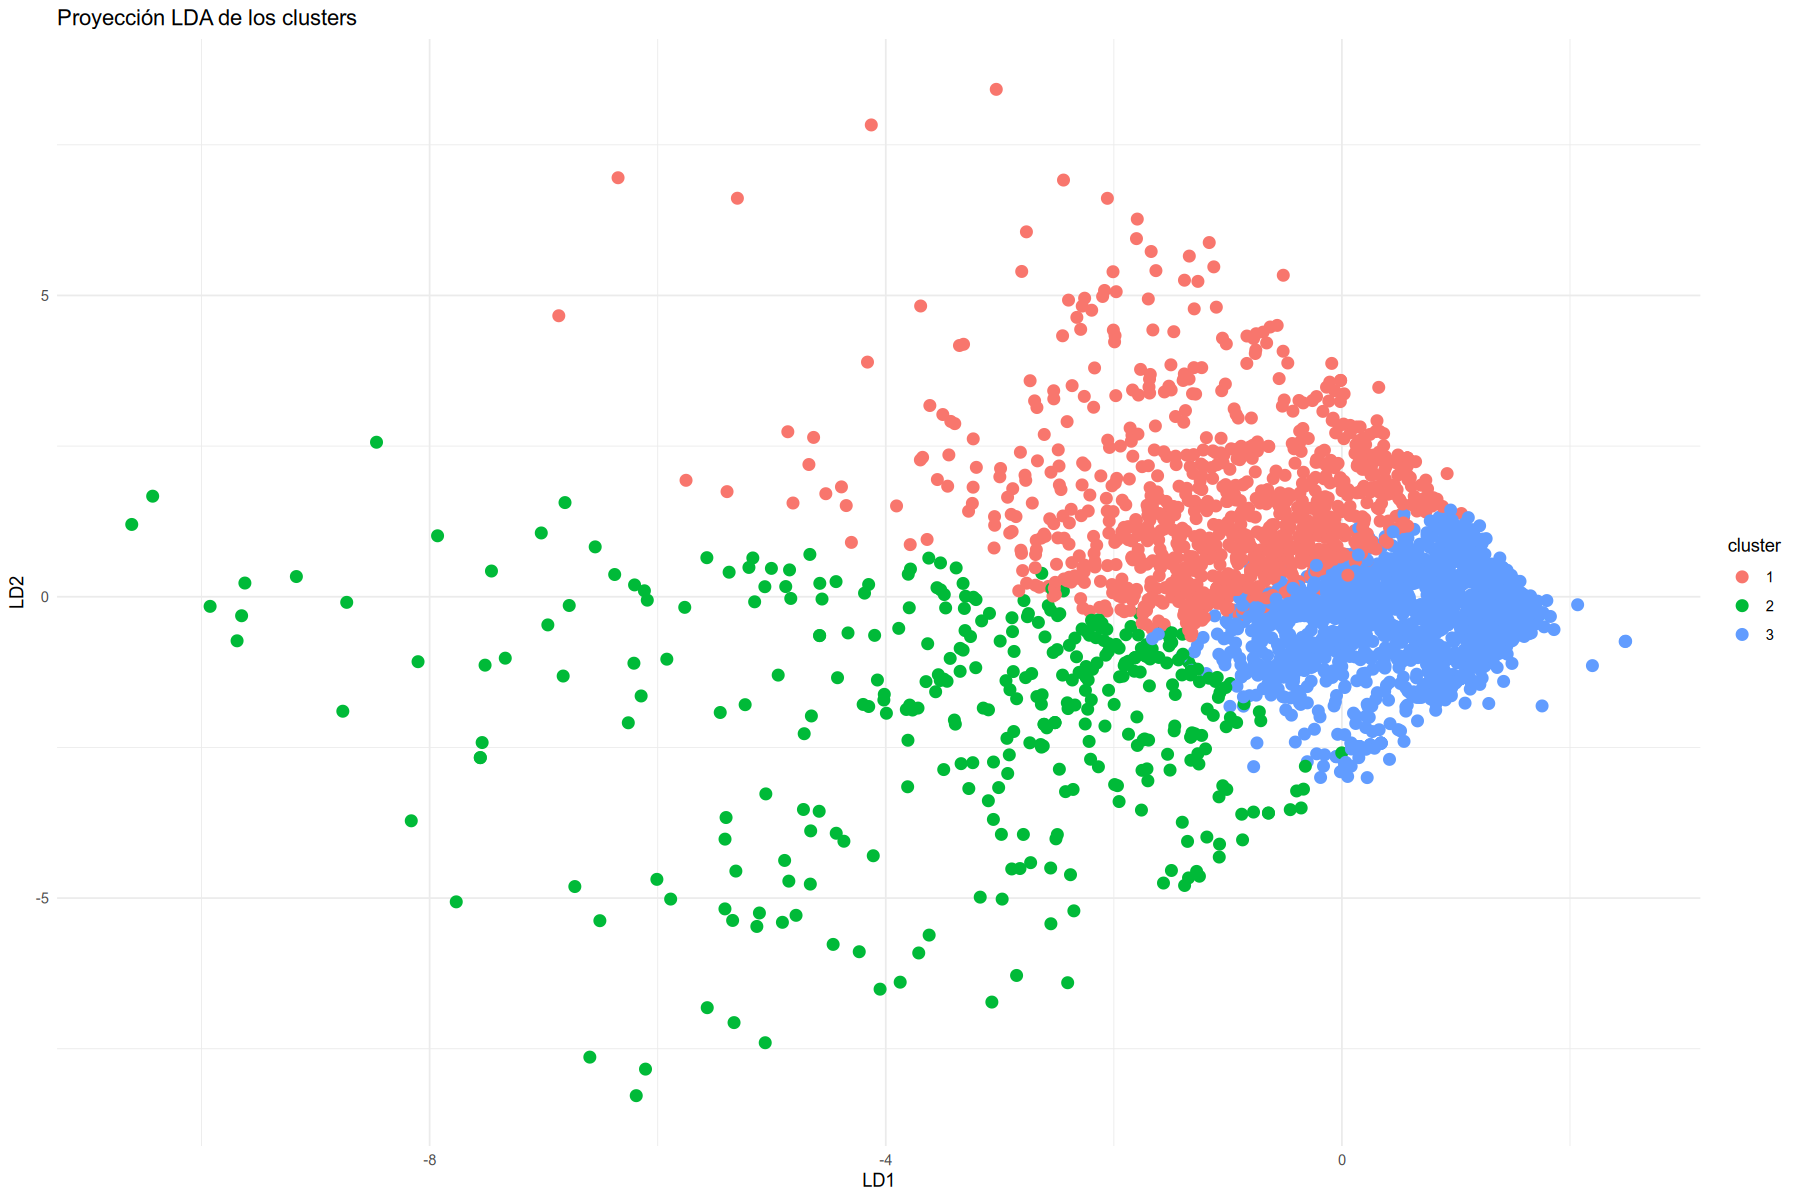

In [86]:
library(ggplot2)
pred <- predict(model_lda)
df_lda <- data.frame(LD1 = pred$x[,1], LD2 = pred$x[,2], cluster = Data_clusters$cluster)

ggplot(df_lda, aes(x=LD1, y=LD2, color=cluster)) +
  geom_point(size=3) +
  theme_minimal() +
  labs(title="Proyección LDA de los clusters")


# LDA Projection of Clusters

### Interpretation of the Plot

This plot shows the data projected onto the first two Linear Discriminants (LD1 and LD2) from the Linear Discriminant Analysis (LDA). Each point represents an observation colored by its actual cluster label (1 = red, 2 = green, 3 = blue).

---

### Observations

- **Cluster 3 (blue)** is tightly grouped and clearly separated from the other clusters along the LD1 axis. This explains the **very low error rate (0.04%)** for this cluster.
  
- **Cluster 1 (red)** overlaps partially with both Clusters 2 and 3, particularly in the center of the projection. This overlap is consistent with the **moderate error rate of 17.77%**, where misclassifications occur mostly with Cluster 3.

- **Cluster 2 (green)** is the most dispersed and overlaps heavily with both other clusters, especially Cluster 1. This dispersion correlates with its **high misclassification rate of 20.22%**.




